# **E-commerce Customer Churn Rate Analysis and Prediction**

## **Data card**

- #### **CustomerID**: Unique customer ID
- #### **Churn**: Churn Flag
- #### **Tenure**: Tenure of customer in organization
- #### **PreferredLoginDevice**: Preferred login device of customer
- #### **CityTier**: City tier
- #### **WarehouseToHome**: Distance in between warehouse to home of customer
- #### **PreferredPaymentMode**: Preferred payment method of customer
- #### **Gender**: Gender of customer
- #### **HourSpendOnApp**: Number of hours spend on mobile application or website
- #### **NumberOfDeviceRegistered**: Total number of devices registered on particular customer
- #### **PreferedOrderCat**: Preferred order category of customer in last month
- #### **SatisfactionScore**: Satisfactory score of customer on service
- #### **MaritalStatus**: Marital status of customer
- #### **NumberOfAddress**: Total number of addresses added on particular customer
- #### **Complain**: Any complaint has been raised in last month
- #### **OrderAmountHikeFromlastYear**: Percentage increase in order from last year
- #### **CouponUsed**: Total number of coupons used in last month
- #### **OrderCount**: Total number of orders placed in last month
- #### **DaySinceLastOrder**: Days since last order by customer
- #### **CashbackAmount**: Average cashback in last month

## **Import packages and load data**

In [1]:
# Import packages and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('E-commerceCustomerChurn.xlsx')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [2]:
# Remove the columns that will not be utilized during the process.
df = df.drop(columns=["CustomerID"])

## **Understanding the dataset**

In [3]:
print("Data type:")
print(df.dtypes)
print("\n")

print("Missing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)
print("\n")

print("Duplicate Check:")
has_duplicates = df.duplicated().any()  
print("Are there duplicate entries?:", has_duplicates)

Data type:
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object


Missing Values in Each Column:
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode      

In [4]:
# Data type transformation
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>From the preliminary dataset, we observe that there are some missing values, but no duplicate entries. The dataset consists of 5,630 rows and 20 columns. Upon reviewing the data types, everything appears to be in order without any anomalies.</b>
</h>

## **Next, lets see the value counts of each of the categorical variables.**

In [5]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print()
        print()

Churn
0    4682
1     948
Name: count, dtype: int64


PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64


PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>The variables above look fine hence there is no need to do anything.</b>
</h>

## **Handling the Missing Values**

In [6]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.0,3.0,6.0,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.0,0.0,1.0,1.0
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.0,15.0,18.0,26.0
CouponUsed,5374.0,1.751023,1.894621,0.0,1.0,1.0,2.0,16.0
OrderCount,5372.0,3.008004,2.939680,1.0,1.0,2.0,3.0,16.0


<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>Let's go about filling the missing values by the median values.</b>
</h>

In [8]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


## **Outlier Treatment**

<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>We will now treat outliers. For this section, we will define the lower range and upper range which is going to be at a distnace of 1.5 times the Interquartile range.</b>
</h>

In [10]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [11]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2.0,Laptop & Accessory,1.0,Married,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5.0,Fashion,5.0,Married,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2.0,Laptop & Accessory,4.0,Married,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5.0,Laptop & Accessory,4.0,Married,4.0,0.0,15.0,2.0,2.0,9.0,179.0


<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>Here we can see that we have treated all the outliers. The outliers are now replaced with their corresponding upper range or lower range values.
</b>
</h>

## **One Hot coding and Scaling of the data**

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,False,False,False,False,True,False,False,False,False,True
1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,False,True,True,False,False,True,False,False,False,True
2,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,False,False,True,False,False,True,False,False,False,True
3,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,False,False,True,False,True,False,False,False,False,True
4,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,...,False,False,True,False,True,False,False,False,True,False
5626,13.0,13.0,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,...,False,False,True,False,False,False,False,False,True,False
5627,1.0,11.0,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,...,False,False,True,False,True,False,False,False,True,False
5628,23.0,9.0,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,...,False,False,True,False,True,False,False,False,True,False


In [13]:
from sklearn.preprocessing import StandardScaler

num = df_encoded.select_dtypes(include=['float64']).columns

scaler = StandardScaler()
features = scaler.fit_transform(df_encoded[num])
scaled_df_encoded = df_encoded.copy()
scaled_df_encoded[num] = features
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,False,False,False,False,True,False,False,False,False,True
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,False,True,True,False,False,True,False,False,False,True
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,False,False,True,False,False,True,False,False,False,True
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,False,False,True,False,True,False,False,False,False,True
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,False,False,True,False,True,False,False,False,True,False
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,False,False,True,False,False,False,False,False,True,False
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,False,False,True,False,True,False,False,False,True,False
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,False,False,True,False,True,False,False,False,True,False


## **Building Classification models**

<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>Before building the models, we will address the class imbalance using SMOTE oversampling.
</b>
</h>

In [14]:
# X represents the features, and y denotes the target variable
X = scaled_df_encoded.drop(['Churn_1'],axis=1)
y = scaled_df_encoded['Churn_1']

<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>Train Test Split
</b>
</h>

Before OverSampling, the shape of X: (4222, 30)
Before OverSampling, the shape of y: (4222,) 

Before OverSampling, counts of label '1': 712
Before OverSampling, counts of label '0': 3510


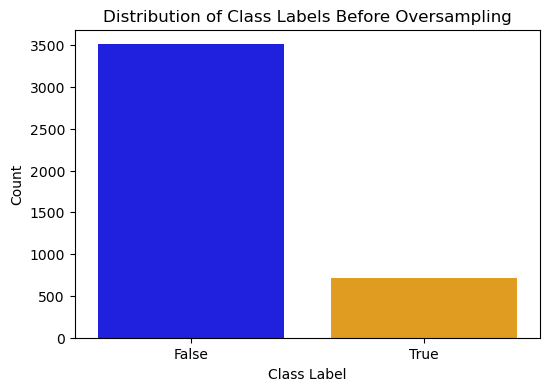

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, train_size = 0.75, random_state=42)

print('Before OverSampling, the shape of X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

# Count the occurrences of each label
label_counts = y_train.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette=['blue', 'orange'])
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Distribution of Class Labels Before Oversampling")
plt.show()

C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


After OverSampling, the shape of X: (7020, 30)
After OverSampling, the shape of y: (7020,) 

After OverSampling, counts of label '1': 3510
After OverSampling, counts of label '0': 3510


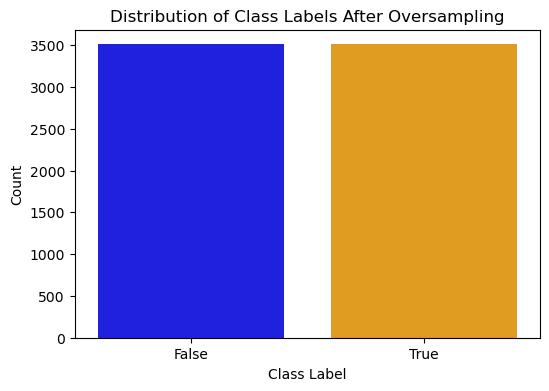

In [16]:
from imblearn.over_sampling import SMOTE 

# Oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

print('After OverSampling, the shape of X: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

# Count occurrences of each label after oversampling
label_counts_sm = y_train_sm.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts_sm.index, y=label_counts_sm.values, palette=['blue', 'orange'])
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Distribution of Class Labels After Oversampling")
plt.show()

<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>After completing data preprocessing—handling missing values, one-hot encoding, scaling, and addressing class imbalance—we can now proceed with building the classification model.
</b>
</h>

## **Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>Model Evaluation
</b>
</h>

AUC: 0.889


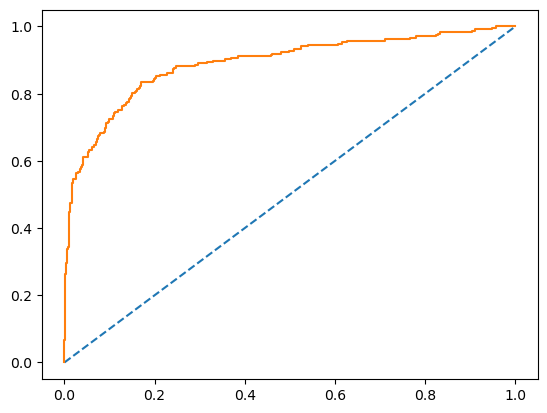

In [18]:
# predict probabilities
probs = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [19]:
y_pred = model_lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.98      0.95      1172
        True       0.84      0.55      0.66       236

    accuracy                           0.91      1408
   macro avg       0.88      0.76      0.80      1408
weighted avg       0.90      0.91      0.90      1408



## **Random Forest**

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
RF_model = RandomForestClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],         
    'max_depth': [None, 10, 20, 30],         
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['auto', 'sqrt', 'log2'] 
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Get the best model
RF_model = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
244 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hankc\anaconda3\Lib\site-packa

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9469480355590454


<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>Model Evaluation
</b>
</h>

AUC: 0.889


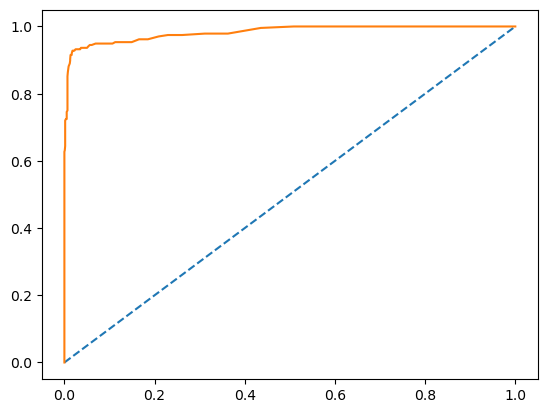

In [21]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [22]:
y_pred = RF_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98      1172
        True       0.96      0.82      0.89       236

    accuracy                           0.96      1408
   macro avg       0.96      0.91      0.93      1408
weighted avg       0.96      0.96      0.96      1408



## **KNN Model**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

<h1 style="font-size:18px; line-height:1.5; padding:10px;">
<b>Model Evaluation
</b>
</h>

AUC: 0.889


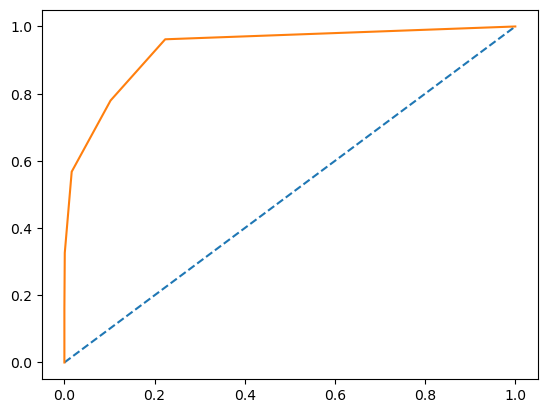

In [24]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [25]:
y_pred = KNN_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      1172
        True       0.88      0.57      0.69       236

    accuracy                           0.91      1408
   macro avg       0.90      0.78      0.82      1408
weighted avg       0.91      0.91      0.91      1408



## **Feature Impact Analysis Using Logistic Regression model**

In [26]:
# Retrieve feature coefficients from the logistic regression model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns, 
    'Coefficient': model_lr.coef_[0]  
})

# Sort features by the absolute value of the coefficients to identify the most important features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()  
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)  
print(feature_importance[['Feature', 'Coefficient']])


                                  Feature  Coefficient
27                PreferedOrderCat_Others     2.018270
24    PreferedOrderCat_Laptop & Accessory    -1.717538
0                                  Tenure    -1.666195
17  PreferredPaymentMode_Cash on Delivery     1.029603
23               PreferedOrderCat_Grocery     0.906277
26          PreferedOrderCat_Mobile Phone    -0.882921
11                         CashbackAmount    -0.875472
14                             CityTier_2     0.823936
6                                Complain     0.804931
29                   MaritalStatus_Single     0.773289
15                             CityTier_3     0.761008
25                PreferedOrderCat_Mobile    -0.733023
5                         NumberOfAddress     0.616893
20          PreferredPaymentMode_E wallet     0.572094
13             PreferredLoginDevice_Phone    -0.552441
16               PreferredPaymentMode_COD     0.527553
12      PreferredLoginDevice_Mobile Phone    -0.426793
22        

## **Conclusion**
### **Which customers are more likely to churn?**
- **Customers who prefer "Other" product categories**
- **Customers who use Cash on Delivery (COD) as a payment method**
- **Customers who have complained before**
- **Single customers from smaller cities**
- **Customers with more registered devices**
### **Which customers are more loyal?**
- **Customers who prefer laptops and mobile phone products**
- **Customers who use cashback offers**
- **Customers with longer tenure**
- **Customers who log in using a mobile device**